### Treść zadania

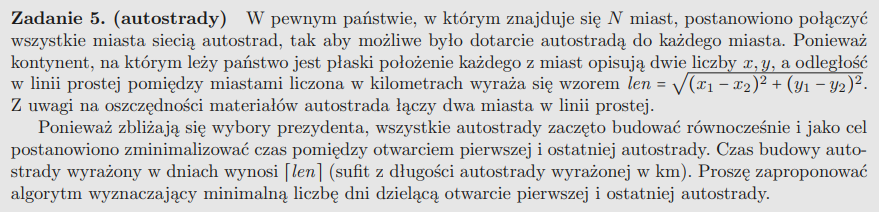

### Omówienie algorytmu

Ponieważ ze wszystkich miast zaczynamy budować wszystkie odcinki jednocześnie, musimy zminimalizować czas budowania najdłuższego z odcinków autostrady. Ponieważ naszym celem nie jest zapewnienie najszybszego dotarcia z danego miasta do innego, a jedynie połączenie wszystkich miast jakąś siecią dróg w taki sposób, że otrzymamy graf spójny, interesować nas będzie rozwiązanie w postaci znalezienia drzewa spinającego. Wynika to stąd, że cykle w żaden sposób nie przyspieszają nam budowy autostrad, a jeżeli już miasto połaczymy optymalną autostradą z innym miastem, to bez sensu jest to miasto łączyć z którymś z pozostałych miast. Musimy jeszcze się zastanowić, który z poznanych algorytmów pozwala nam na wyznaczenie minimalnego drzewa spinającego o minimalnej długości (wadze) najdłuższej krawędzi. Na myśl powinien nam przyjść algorytm Kruskala, który korzysta z tego, że najpierw zostujemy listę krawędzi po wagach w sposób niemalejący, a następnie próbujemy dołożyć do naszego minimalnego drzewa spinającego krawędź o najmniejszej wadze. Ponieważ zawsze dobieramy tylko te krawędzie, które możemy wziąć i mają najmniejsze wagi spośród wszystkich krawędzi, krawędź na której skończymy tworzyć drzewo spinające, będzie odpowiadała długości najdłuższego odcinka autostrady.
<br><br>
Ponieważ dla nas nadrzędnym warunkiem jest zminimalizowanie czasu między otwarciem pierwszej i ostatniej autostrady, a nie tylko zminimalizowanie czasu otwarcia ostatniego z odcinków autostrady, konieczne jest kolejno budowanie minimalnych drzew spinających i sprawdzanie różnicy między czasem otwarcia pierwszej i czasem otwarcia ostatniej autostrady. W kolejnych iteracjach będziemy usuwać najkrótszą krawędź z grafu o ile istnieje wciąż inna krawędź, która łączy dany wierzchołek z innym wierzchołkiem w grafie) i na nowo wyznaczać MST i badać różnicę między czasem otwarcia ostatniej a czasem otwarcia pierwszej autostrady. Ponieważ krawędzie trzymamy w liście, najlepiej jest je posortować w porządku nierosnącym, tak aby najkrósze odcinki znalazły się na koncu autostraty i mogły być szybko usunięte z listy. Kiedy przerywamy program? Ponieważ usuwamy krawędzie, w końcu spotka nas taka sytuacja, w której już nie będziemy mogli wyznaczyć MST, ponieważ rozspójnimy graf. Zamiast sprawdzać za każdym razem osobno spójność, przy pomocy algorytmu BFS/DFS (co i tak wiązałoby się ze zbudowaniem grafu na podstawie pozostałych krawędzi), wystarczy, że będziemy zawsze po zakończeniu algorytmu Kruskala, sprawdzali dodatkowo, czy wszystkie wierzchołki należą do tego samego zbioru, a więc, czy są połączone. Jeżeli nie, oznacza to, że nie możemy już zbudować MST, a więc kończymy nasz algorytm. Możemy od razu zakończyć, ponieważ, gdybyśmy zostawili poprzednio najkrótszą krawędź, którą usunęliśmy i zamiast niej usunęli jakąś inną krawędź o większej wadze, otrzymalibyśmy napewno MST o takiej samej lub większej wadze najdłuższej krawędzi, więc jedynie byśmy się oddalali od poszukiwanego rozwiązania, czyli minimalnej różnicy między wagą najdłuższej a wagą najkrótszej krawędzi.
###### Dodatkowy opis z dowodem poprawności
https://stackoverflow.com/questions/29900927/algorithm-for-finding-the-path-that-minimizes-the-maximum-weight-between-two-nod

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(E) + E \cdot E \cdot log^*(V)) = | E = V^2 | = O(V^2 \cdot log(V^2) + V^4 \cdot log^*(V)) = O(V^4 \cdot log^*(V)) $ - bo mamy graf pełny (każde miasto możemy połączyć z każdym), więc mamy $ O(V^2) $ krawędzi.
###### Pamięciowa:
$ O(E + V) = | E = V^2 | = O(V^2) $

### Implementacja

In [1]:
import math


class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit


def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1


def make_set(x: 'id'):
    return Node(x)


def connected(x: 'id', y: 'id'):
    return find(x) == find(y)


def kruskal(G: '(V, E)'):
    V, E = G
    # Makeset for each of the vertices
    vert = [make_set(v) for v in V]
    # In a loop pick an edge of the smallest weight
    # and check if we can add this edge to the minimum
    # spanning tree
    max_edge = None
    for i in range(len(E) - 1, -1, -1):
        edge = E[i]
        u, v, weight = edge
        if not connected(vert[u], vert[v]):
            union(vert[u], vert[v])
            max_edge = edge
    # Check if all vertices are connected (if we got a MST)
    root = find(vert[0])
    for i in range(1, len(V)):
        if find(vert[i]) != root:
            return None
    # Otherwise, if we have a MST, return the max-weight edge
    return max_edge


def distance(A, B):
    return ((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2) ** .5


def edges_list(A):
    E = []
    n = len(A)
    for i in range(n - 1):
        for j in range(i + 1, n):
            E.append((i, j, distance(A[i], A[j])))
    return E


def highway(A):
    n = len(A)
    V = list(range(n))
    E = edges_list(A)
    # Sort an array of edges by their length in a reversed order
    # (to easily remove shortest edges)
    E.sort(reverse=True, key=lambda e: e[2])
    # Search for minimum difference between max distance and min distance
    G = (V, E)
    min_diff = float('inf')

    while True:
        max_edge = kruskal(G)
        if not max_edge: break
        min_edge = E.pop()
        u, v, min_length = min_edge
        min_diff = min(min_diff, max_edge[2] - min_length)

    return math.ceil(min_diff)

###### Kilka testów

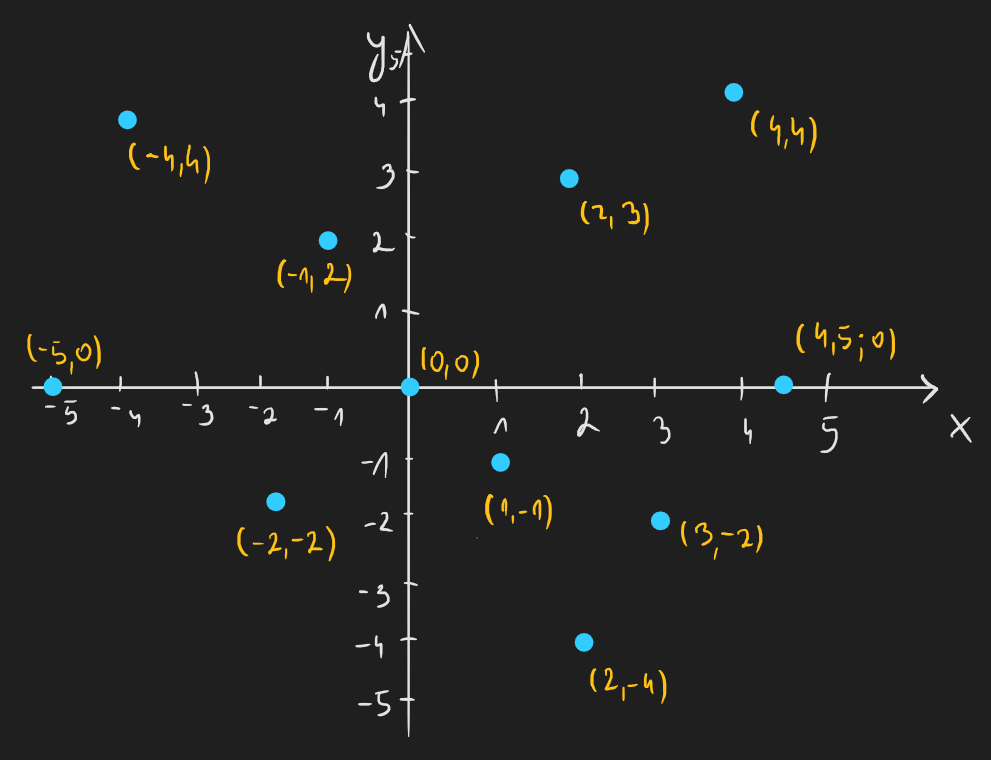

In [2]:
P = [(4, 4), (2, 3), (4.5, 0), (0, 0), (1, -1), (3, -2), (2, -4), (-1, 2), (-2, -2), (-4, 4), (-5, 0)]
print(highway(P))

1


### (Dodatkowo) Zwracanie listy połączonych miast

In [3]:
import math


class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit


def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1


def make_set(x: 'id'):
    return Node(x)


def connected(x: 'id', y: 'id'):
    return find(x) == find(y)


def kruskal(G: '(V, E)'):
    V, E = G
    # Makeset for each of the vertices
    vert = [make_set(v) for v in V]
    # In a loop pick an edge of the smallest weight
    # and check if we can add this edge to the minimum
    # spanning tree
    max_edge = None
    edges = []
    for i in range(len(E) - 1, -1, -1):
        edge = E[i]
        u, v, weight = edge
        if not connected(vert[u], vert[v]):
            union(vert[u], vert[v])
            max_edge = edge
            edges.append(edge)
    # Check if all vertices are connected (if we got a MST)
    root = find(vert[0])
    for i in range(1, len(V)):
        if find(vert[i]) != root:
            return None, []
    # Otherwise, if we have a MST, return the max-weight edge
    return max_edge, edges


def distance(A, B):
    return ((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2) ** .5


def edges_list(A):
    E = []
    n = len(A)
    for i in range(n - 1):
        for j in range(i + 1, n):
            E.append((i, j, distance(A[i], A[j])))
    return E


def highway(A):
    n = len(A)
    V = list(range(n))
    E = edges_list(A)
    # Sort an array of edges by their length in a reversed order
    # (to easily remove shortest edges)
    E.sort(reverse=True, key=lambda e: e[2])
    # Search for minimum difference between max distance and min distance
    G = (V, E)
    min_diff = float('inf')
    res_edges = []
    
    while True:
        max_edge, edges = kruskal(G)
        if not max_edge: break
        min_edge = E.pop()
        u, v, min_length = min_edge
        curr_diff = max_edge[2] - min_length
        if curr_diff < min_diff:
            min_diff = curr_diff
            res_edges = edges

    return math.ceil(min_diff), res_edges

###### Kilka testów

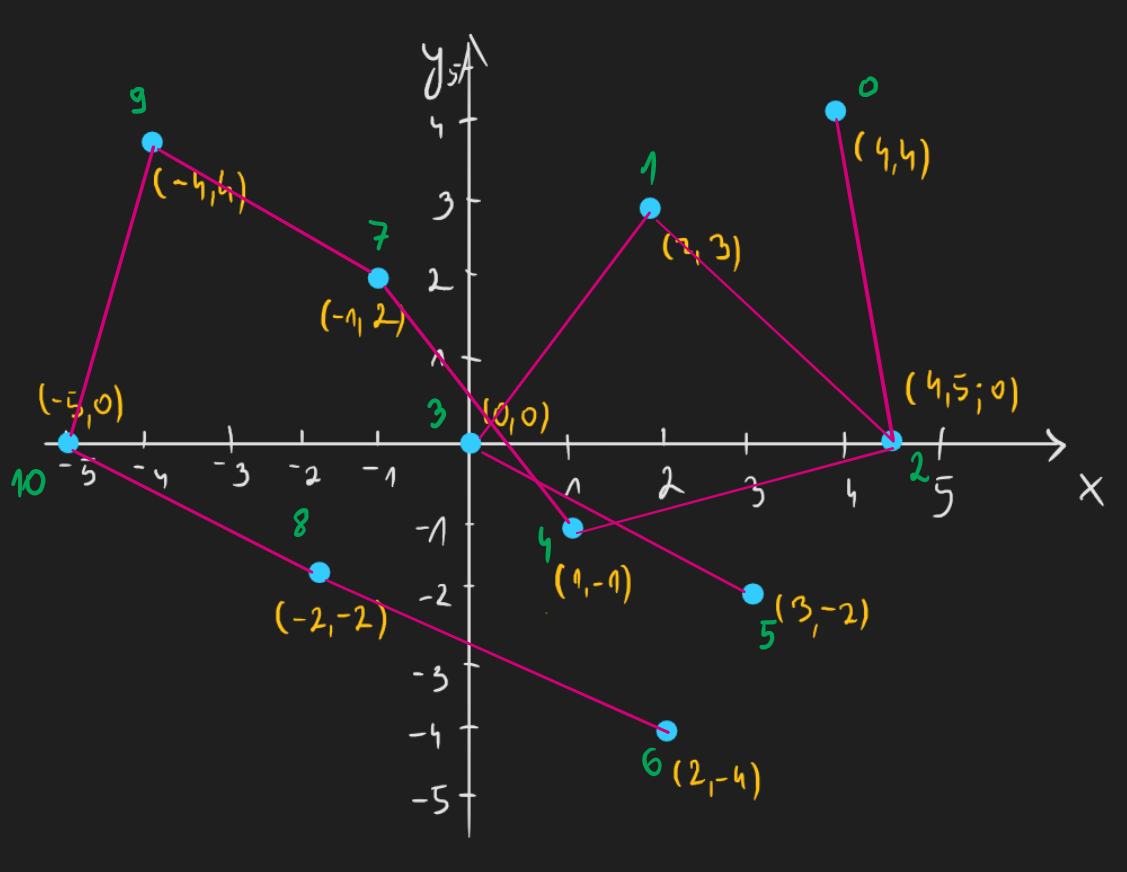

In [4]:
P = [(4, 4), (2, 3), (4.5, 0), (0, 0), (1, -1), (3, -2), (2, -4), (-1, 2), (-2, -2), (-4, 4), (-5, 0)]

min_time, connenections = highway(P)
print(f'Minimum required time: {min_time} days')
print('Connected cities coordinates:')
for p1, p2, dist in connenections:
    print(f'{p1} - {p2:<2} (distance: {dist:.3f}) (points: {P[p1]} - {P[p2]})')

Minimum required time: 1 days
Connected cities coordinates:
8 - 10 (distance: 3.606) (points: (-2, -2) - (-5, 0))
7 - 9  (distance: 3.606) (points: (-1, 2) - (-4, 4))
4 - 7  (distance: 3.606) (points: (1, -1) - (-1, 2))
3 - 5  (distance: 3.606) (points: (0, 0) - (3, -2))
1 - 3  (distance: 3.606) (points: (2, 3) - (0, 0))
2 - 4  (distance: 3.640) (points: (4.5, 0) - (1, -1))
1 - 2  (distance: 3.905) (points: (2, 3) - (4.5, 0))
0 - 2  (distance: 4.031) (points: (4, 4) - (4.5, 0))
9 - 10 (distance: 4.123) (points: (-4, 4) - (-5, 0))
6 - 8  (distance: 4.472) (points: (2, -4) - (-2, -2))


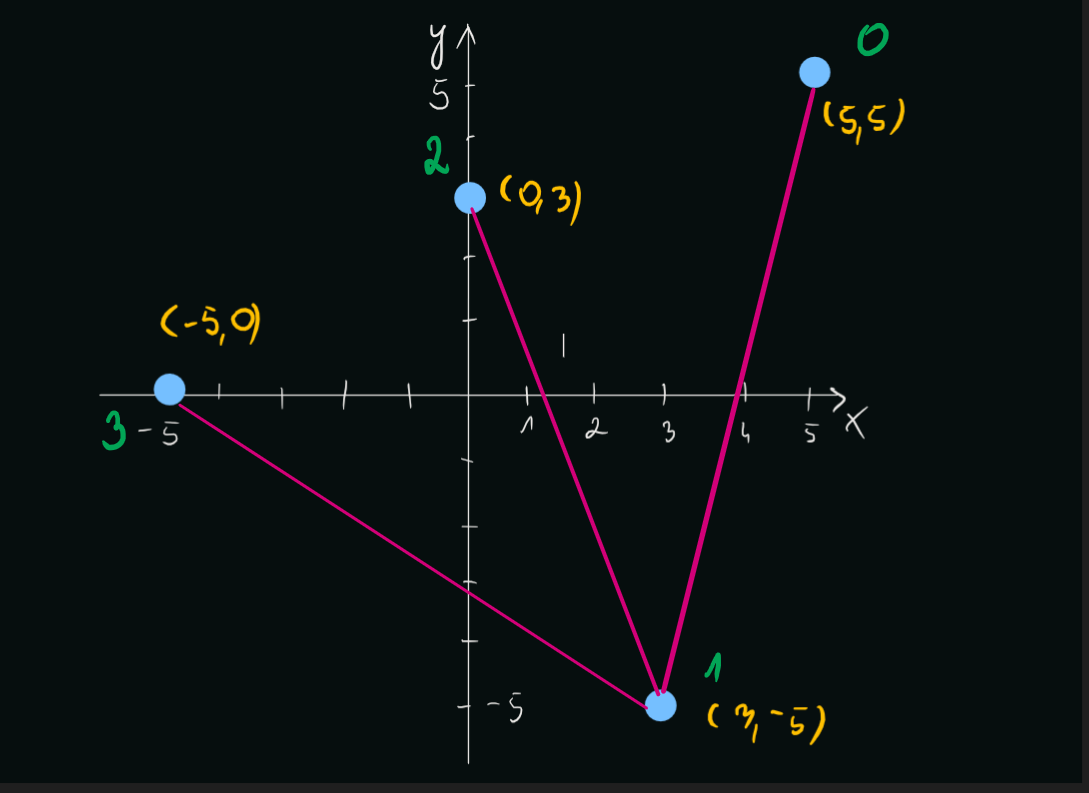

In [5]:
P = [(5, 5), (3, -5), (0, 3), (-5, 0)]

min_time, connenections = highway(P)
print(f'Minimum required time: {min_time} days')
print('Connected cities coordinates:')
for p1, p2, dist in connenections:
    print(f'{p1} - {p2:<2} (distance: {dist:.3f}) (points: {P[p1]} - {P[p2]})')

Minimum required time: 2 days
Connected cities coordinates:
1 - 2  (distance: 8.544) (points: (3, -5) - (0, 3))
1 - 3  (distance: 9.434) (points: (3, -5) - (-5, 0))
0 - 1  (distance: 10.198) (points: (5, 5) - (3, -5))
